In [1]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

import random
# зафиксируем сид для воспроизводимости генерации
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

## Критерии вида t-test

### Одновыборочный

Дана одна нормальная выборка $X_1, ..., X_n \sim \mathcal{N}(a, \sigma^2)$.

Критерий проверяет гипотезы

$\mathsf{H}_0\colon a = a_0$

$\mathsf{H}_1\colon a \not= a_0$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp">`ttest_1samp`</a>`(a, popmean): statistic, pvalue`

* `a` &mdash; выборка
* `popmean` &mdash; равно $a_0$

Сгенерируйте выборку $X_1, ..., X_n \sim \mathcal{N}(0, 1)$ и с помощью критерия проверьте:
- равенство среднего нулю 
- равенство среднего 0.5

In [4]:
size=100

sample = sps.norm.rvs(size=size)
res0=sps.ttest_1samp(sample, popmean=0)
res0_5=sps.ttest_1samp(sample, popmean=0.5)
print(f'Равенство нулю: {res0}\n Равенство 0.5: {res0_5}')

Равенство нулю: Ttest_1sampResult(statistic=0.23388185880887125, pvalue=0.815559661166809)
 Равенство 0.5: Ttest_1sampResult(statistic=-5.009027554518944, pvalue=2.3903615856471754e-06)


### Двухвыборочный

#### Независимые выборки

Даны две независимые нормальные выборки

* $X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$,

* $Y_1, ..., Y_m \sim \mathcal{N}(a_2, \sigma_2^2)$.

Критерий проверяет для их гипотезы о равенстве среднего:

$\mathsf{H}_0\colon a_1 = a_2$

$\mathsf{H}_1\colon a_1 \not= a_2$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind">`ttest_ind`</a>`(a, b, equal_var=True): statistic, pvalue`

`a`, `b` &mdash; выборка

`equal_var` &mdash; известно ли равенство дисперсий

Сгенерируйте выборки $X_1, ..., X_n \sim \mathcal{N}(0, 1)$ и $X_1, ..., X_m \sim \mathcal{N}(1, 1)$. Используя критерий, проверьте равенство средних двух выборок.

In [5]:
sample_1 = sps.norm.rvs(size=size)
sample_2 = sps.norm(loc=1).rvs(size=size + np.random.randint(0,size))
sps.ttest_ind(sample_1, sample_2, equal_var=True)

Ttest_indResult(statistic=-7.747720471902985, pvalue=2.8666188115761077e-13)

Сгенерируйте выборки $X_1, ..., X_n \sim \mathcal{N}(0, 1)$ и $X_1, ..., X_m \sim \mathcal{N}(1, 7)$. Используя критерий, проверьте равенство средних двух выборок.

In [6]:
sample_1 = sps.norm.rvs(size=size)
sample_2 = sps.norm(loc=1, scale=np.sqrt(7)).rvs(size= size+ np.random.randint(0,size))
sps.ttest_ind(sample_1, sample_2, equal_var=False)

Ttest_indResult(statistic=-4.685590664856528, pvalue=5.68010586855591e-06)

#### Связные выборки

Даны две связные нормальные выборки

* $X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$,

* $Y_1, ..., Y_n \sim \mathcal{N}(a_2, \sigma_2^2)$.


Критерий проверяет для их гипотезы о равенстве среднего:

$\mathsf{H}_0\colon a_1 = a_2$

$\mathsf{H}_1\colon a_1 \not= a_2$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel">`ttest_rel`</a>`(a, b): statistic, pvalue`

`a`, `b` &mdash; выборка

Сгенерируйте выборку $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Вторую сгенерируйте по формуле выборка_1 + случайный шум, случайный шум из  $\mathcal{N}(0, 0.5)$. Используя критерий, проверьте гипотезу о равенстве среднего.

In [8]:
sample_1 = sps.norm.rvs(size=size)
sample_2 = sample_1 +sps.norm(scale=np.sqrt(0.5)).rvs(size=size)
sps.ttest_rel(sample_1, sample_2)

Ttest_relResult(statistic=-0.18477626644241638, pvalue=0.8537825210767473)

Сгенерируйте выборку $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Вторую сгенерируйте по формуле выборка_1 + случайный шум, случайный шум из  $\mathcal{N}(0.5, 0.5)$. Используя критерий, проверьте гипотезу о равенстве среднего.

In [9]:
sample_1 = sample_1
sample_2 = sample_1+sps.norm(loc=0.5, scale=np.sqrt(0.5)).rvs(size=size)
sps.ttest_rel(sample_1, sample_2)

Ttest_relResult(statistic=-8.48095903548231, pvalue=2.2136477531772284e-13)

### Пример: ирисы Фишера

Визуализация данных

c:\Users\ibeli\anaconda3\envs\mipt-stats\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\ibeli\anaconda3\envs\mipt-stats\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\ibeli\anaconda3\envs\mipt-stats\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\ibeli\anaconda3\envs\mipt-stats\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\ibeli\anaconda3\envs\mipt-stats\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\ibeli\anaconda3\envs\mipt-stats\lib\site-packages\seaborn\distributions

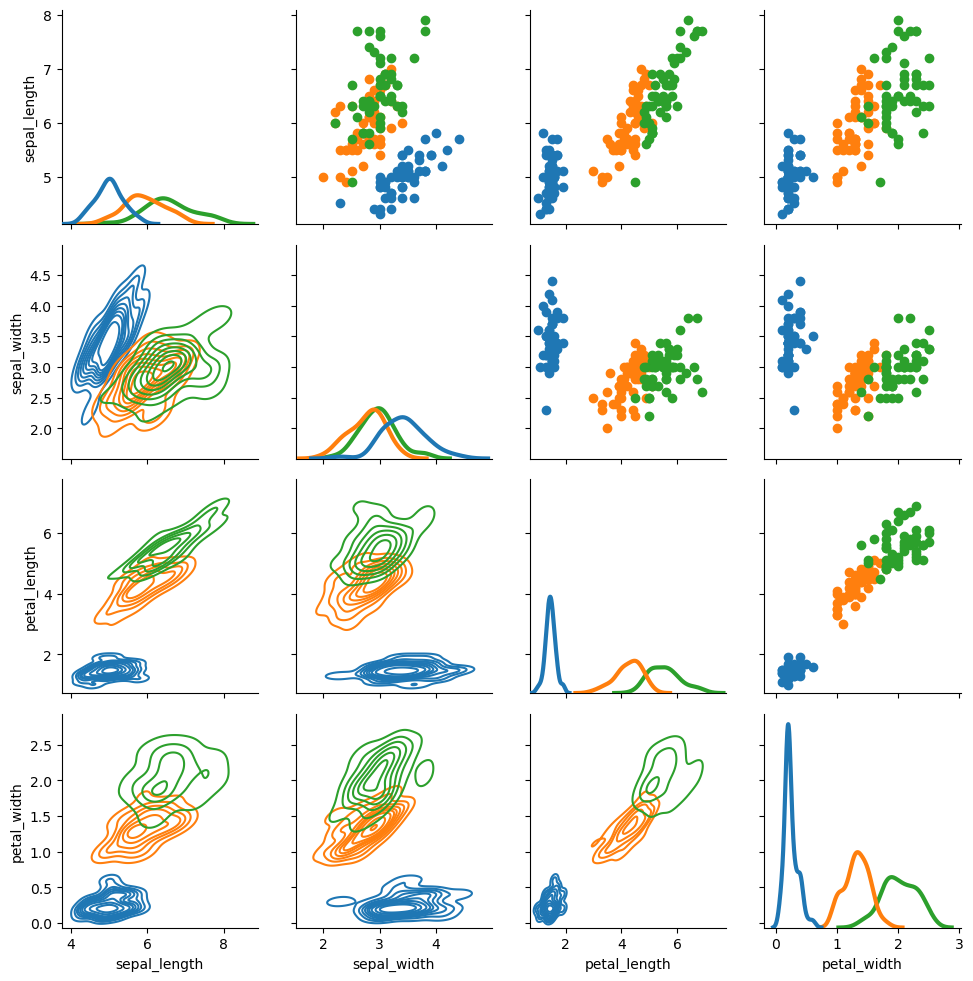

In [10]:
df = sns.load_dataset("iris")

g = sns.PairGrid(df, hue='species')
g.map_lower(sns.kdeplot, cmap ="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

Как выглядят данные

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Виды ирисов

In [12]:
np.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
sps.ttest_ind(df[df.species == 'setosa'].sepal_length, 
              df[df.species == 'versicolor'].sepal_length,
              equal_var=False)

Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

In [14]:
sps.ttest_ind(df[df.species == 'virginica'].sepal_length, 
              df[df.species == 'versicolor'].sepal_length,
              equal_var=False)

Ttest_indResult(statistic=5.629165259719801, pvalue=1.8661443873771216e-07)

In [15]:
sps.ttest_ind(df[df.species == 'virginica'].sepal_width, 
              df[df.species == 'versicolor'].sepal_width,
              equal_var=False)

Ttest_indResult(statistic=3.2057607502218186, pvalue=0.001819483482104968)

*Замечание.* Строго говоря, неоходима поправка на множественное тестирование гипотез.

**Вывод:** 
- Видно, что функция `ttest` помогает нам исследовать гипотезы, теперь мы можем обобщить то, что было в прошлом дз и мы реализовывали сами на случай связных выборок и выборок разных размеров. 
- В примерах выборок сгенерированных из нормальных распределений с одинаковыми матожиданиями, мы ожидаемо получили высокие значения `p_value`, что говорит нам о невозможности отвержения гипотезы $H_0$, даёт статистически незначимый результат. В случае выброк из распредений с заведомо разными матожиданиями мы получаем низкий уровень `p_value`, позволяющий уверенно отвергать $H_0$
- Видно, что у ирисов видов `setoza` и `versicolor` значение `p_value` наиболее низкое, а значит мы наиболее  уверенно можем отвергать гипотезу о равенстве их средних длин

## Множественная проверка гипотез

С помощью статистических методов можно проверить человека на наличие экстрасенсорных способностей: предложим ему угадать последовательность, состоящую из двух цветов, длины 100. 

Сформулируем задачу на статистическом языке: 

$X_1...X_{100}$ &mdash; выборка из распределения $Bern(p)$

$p=0.5$ отвечает случайному угадыванию.

Проверьте гипотезу: $\mathsf{H}_0 \colon p=0.5$ vs $\mathsf{H}_1 \colon p \neq 0.5$. Используйте критерий Вальда.

В качестве асимптотически нормальной оценки можно использовать $\widehat{p} = \overline{X}$ с асимптотической дисперсией $\sigma^2(p) = p (1 - p)$.

Выпишем состоятельную оценку дисперсии и статистику критерия Вальда:

$\widehat{\sigma} = \sqrt{\overline{X} (1 - \overline{X})}$, $W = \sqrt{n} \frac{\overline{X} - 0.5}{\sqrt{\overline{X} (1 - \overline{X})}}$

Оценим реальный уровень значимости для этого критерия при размере выборки равном 100. К чему он должен быть близок? Для скорости вычислений используйте количество выборок равное $10^3$.

In [24]:
sample_size = 200
sample_count = 1000

theta = 0.5

In [25]:
def wald_test(sample, theta, estimation_theta, estimation_sigma, alternative='two_sided'):
    """
    param sample: реализация выборки
    param theta: истинное значение параметра
    param estimation_theta: оценка параметра
    param estimation_sigma: оценка асимптотической дисперсии оценки estimation_sigma
    param alternative: вид альтернативной гипотезы, может принимать одно из значений 'two_sided', 'less', 'greater'

    return statistic
    return p_value
    """

    alpha = 0.05
    z = sps.norm.ppf(1 - alpha/2)
    n = len(sample)
    statistic = np.sqrt(n) * (estimation_theta - theta) / estimation_sigma

    if alternative == 'two_sided':
        p_value = sps.norm.sf(np.abs(statistic)) + sps.norm.cdf(-np.abs(statistic))
        conf_int = round(estimation_theta - z*estimation_sigma/np.sqrt(n), 4), round(estimation_theta + z*estimation_sigma/np.sqrt(n), 4)


    elif alternative == 'less':
        p_value = sps.norm.cdf(statistic)
        conf_int = (-np.inf, round(estimation_theta + z*estimation_sigma/np.sqrt(n), 4))

    
    elif alternative == 'greater':
        p_value = sps.norm.sf(statistic)
        conf_int = (round(estimation_theta + z*estimation_sigma/np.sqrt(n), 4), np.inf)

    else:
        raise ValueError('alternative name is wrong')

    return statistic, p_value, conf_int

Оценим реальный уровень значимости

In [26]:
sample = sps.bernoulli(0.5).rvs(size=(sample_count, sample_size))

estimation_theta = sample.mean(axis=1) 
estimation_sigma = np.sqrt(estimation_theta*(1-estimation_theta))


counter = 0

for i in range(sample_count):
    _, p_value, conf_int = wald_test(sample[i], theta, estimation_theta[i], estimation_sigma[i])
    is_rejected = conf_int[0] > 0.5 or conf_int[1]<0.5
    if is_rejected:
        counter += 1
        
counter / sample_count
        


0.057

Теперь представим, что мы хотим проверить большое количество людей на экстрасенсорные способности с помощью данного критерия.

Проведите аналогичный эксперимент: сгенерируйте $10^3$ выборок размера $100$ для $100$ людей. Посчитайте, сколько раз из 1000 в вашем наборе из 100 выборок хотя бы для одной гипотеза будет отвергнута. 

In [27]:
sample_all = sps.bernoulli(0.5).rvs(size=(1000,100,100))

counter = 0
for sample in sample_all:
    estimation_theta = np.mean(sample, axis=1)
    estimation_sigma = np.sqrt(estimation_theta*(1-estimation_theta))

    for i in range(100):
        _, p_value, conf_int = wald_test(sample[i], theta, estimation_theta[i], estimation_sigma[i])
        is_rejected = conf_int[0] > 0.5 or conf_int[1]<0.5
        if is_rejected:
            counter += 1
            break

In [28]:
counter / 1000

0.993

**Вывод:** Если проверять таким образом на экстрасенсорные способности очень много людей, то хотя бы у одного они выявятся с большой вероятностью.

На лекции вы прошли метод, позволяющий не накапливать ошибку 1 рода. В этом методе необходимо использовать уровень значимости, зависящий от количества проверяемых одновременно гипотез. 

**Чему равен этот уровень значимости, если одновременно проверяются n гипотез?**

**Ответ:** $n\cdot\alpha=\alpha^{true}=100\cdot 0.05=5$

Проведите предыдущий эксперимент с использованием корректной процедуры. Поскольку в реализованной выше функции $\alpha$ зафиксировано, используйте критерий отвержения гипотезы с помощью p-value.

In [29]:
sample_all = sps.bernoulli(0.5).rvs(size=(1000,100,100))

counter = 0
for sample in sample_all:
    estimation_theta = np.mean(sample, axis=1)
    estimation_sigma = np.sqrt(estimation_theta*(1-estimation_theta))

    for i in range(100):
        _, p_value, conf_int = wald_test(sample[i], theta, estimation_theta[i], estimation_sigma[i])
        is_rejected = p_value<0.05/100 #Здесь мы делим на 100, т.к. проверяем 100 гипотез
        if is_rejected:
            counter += 1
            break        

In [30]:
counter / 1000

0.073

**Вывод:** При учёте накопления ошибок 1 рода, оказывается что экстрасенсов не так уж и много на самом деле, т.к. полученное значение более корректно отражает иситну.